In [1]:
# Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, confusion_matrix, classification_report)
from sklearn.model_selection import train_test_split, cross_val_score

# ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Utilities
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Loading the Employee Promotion Dataset from kaggle, Employee Performance for HR Analytics Dataset

In [2]:
promotion_dataset = pd.read_csv('./dataset/employee_promotion.csv')

employee_performance_dataset = pd.read_csv('./dataset/Uncleaned_employees_final_dataset.csv')

In [3]:
## sorting the promotion dataset by employee_id

promotion_dataset = promotion_dataset.sort_values(by='employee_id')
promotion_dataset.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted
52690,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3.0,5,0,85.0,0
10257,2,Finance,region_2,Master's & above,f,sourcing,1,35,1.0,2,0,63.0,0
32895,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3.0,2,0,53.0,0
4424,5,Analytics,region_7,Master's & above,m,other,2,46,3.0,7,0,86.0,0
41261,7,Operations,region_32,Bachelor's,m,other,1,31,3.0,7,0,59.0,0
48688,8,Sales & Marketing,region_7,Bachelor's,m,other,1,42,5.0,6,0,52.0,0
50757,9,Sales & Marketing,region_27,Bachelor's,m,sourcing,1,29,5.0,2,0,50.0,0
44500,10,Operations,region_24,Master's & above,m,other,1,35,4.0,9,0,60.0,0
993,12,Technology,region_31,Bachelor's,m,other,1,24,3.0,2,0,77.0,0
28678,14,Operations,region_2,Bachelor's,f,sourcing,2,38,5.0,8,0,60.0,0


In [4]:
## sorting the employee performance dataset by employee_id

employee_performance_dataset = employee_performance_dataset.sort_values(by='employee_id')

employee_performance_dataset.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
8692,3,Procurement,region_22,Masters & above,f,other,1,38,5.0,4,1,0,67
9473,6,Sales & Marketing,region_15,Bachelors,f,other,1,38,3.0,10,0,0,50
13442,11,Technology,region_4,Masters & above,f,sourcing,1,39,4.0,12,1,0,72
7876,13,Sales & Marketing,region_17,Bachelors,m,other,1,38,1.0,5,1,0,47
6112,16,Sales & Marketing,region_4,Masters & above,m,sourcing,1,40,5.0,5,0,0,53
14222,17,Sales & Marketing,region_7,Bachelors,m,sourcing,1,50,5.0,13,0,0,47
2427,19,HR,region_2,Masters & above,f,other,1,50,4.0,7,1,0,45
11069,20,Analytics,region_21,Bachelors,m,sourcing,1,27,NaN,1,1,0,89
3151,21,Analytics,region_8,Bachelors,m,sourcing,2,28,2.0,3,1,0,85
14492,22,Technology,region_2,Masters & above,f,other,1,57,4.0,18,1,0,77


###### If we look from the above 2 datasets, some employee_ids are missing from promotion dataset but is available from the employee hr analytics dataset. So will be concatenating these 2 datasets for the analysis of 5th Objective based on the employee_id criteria

In [5]:
concatenated_dataset = pd.concat([promotion_dataset,employee_performance_dataset], ignore_index=True, sort=False)

In [6]:
## printing the concatenated dataset by sorting based on employee_id 

concatenated_dataset = concatenated_dataset.sort_values(by='employee_id')

In [7]:
concatenated_dataset.head(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
0,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3.0,5,0,85.0,0.0,NaN
1,2,Finance,region_2,Master's & above,f,sourcing,1,35,1.0,2,0,63.0,0.0,NaN
54808,3,Procurement,region_22,Masters & above,f,other,1,38,5.0,4,0,67.0,NaN,1.0
2,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3.0,2,0,53.0,0.0,NaN
3,5,Analytics,region_7,Master's & above,m,other,2,46,3.0,7,0,86.0,0.0,NaN
54809,6,Sales & Marketing,region_15,Bachelors,f,other,1,38,3.0,10,0,50.0,NaN,0.0
4,7,Operations,region_32,Bachelor's,m,other,1,31,3.0,7,0,59.0,0.0,NaN
5,8,Sales & Marketing,region_7,Bachelor's,m,other,1,42,5.0,6,0,52.0,0.0,NaN
6,9,Sales & Marketing,region_27,Bachelor's,m,sourcing,1,29,5.0,2,0,50.0,0.0,NaN
7,10,Operations,region_24,Master's & above,m,other,1,35,4.0,9,0,60.0,0.0,NaN


In [8]:
## showing the last 20 records of the concatenated dataset

concatenated_dataset.tail(20)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
54793,78277,Operations,region_22,Bachelor's,m,sourcing,2,32,4.0,4,0,54.0,0.0,NaN
72220,78279,Operations,region_31,Masters & above,m,sourcing,1,37,5.0,7,0,57.0,NaN,1.0
72221,78280,Sales & Marketing,region_7,Bachelors,m,sourcing,2,30,NaN,1,0,51.0,NaN,0.0
54794,78281,Operations,region_19,Master's & above,m,other,1,44,3.0,7,0,58.0,1.0,NaN
54795,78282,Sales & Marketing,region_32,Bachelor's,m,other,1,34,2.0,8,0,51.0,0.0,NaN
72222,78283,Operations,region_12,Bachelors,f,sourcing,1,28,3.0,4,0,57.0,NaN,0.0
54796,78285,Sales & Marketing,region_27,Master's & above,m,other,1,42,3.0,2,0,94.0,1.0,NaN
54797,78286,Sales & Marketing,region_26,Bachelor's,f,sourcing,1,34,3.0,5,0,46.0,0.0,NaN
54798,78287,Analytics,region_7,Bachelor's,m,other,1,35,3.0,2,0,83.0,0.0,NaN
54799,78288,Sales & Marketing,region_32,Bachelor's,m,sourcing,1,29,3.0,3,1,60.0,1.0,NaN


### Performing Data Cleaning

In [9]:
## analysing how many rows and columns are there in the concatenated dataset

concatenated_dataset.shape

(72225, 14)

In [10]:
## total number of columns in the concatenated dataset

concatenated_dataset.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'awards_won', 'avg_training_score', 'is_promoted',
       'KPIs_met_more_than_80'],
      dtype='object')

In [11]:
concatenated_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
employee_id,72225.0,39168.740048,22615.578411,1.0,19567.0,39203.0,58749.0,78298.0
no_of_trainings,72225.0,1.252461,0.606016,1.0,1.0,1.0,1.0,10.0
age,72225.0,34.804846,7.668299,20.0,29.0,33.0,39.0,60.0
previous_year_rating,66738.0,3.333154,1.261302,1.0,3.0,3.0,4.0,5.0
length_of_service,72225.0,5.850163,4.243728,1.0,3.0,5.0,7.0,37.0
awards_won,72225.0,0.023219,0.150600,0.0,0.0,0.0,0.0,1.0
avg_training_score,69665.0,63.578253,13.497950,39.0,51.0,60.0,77.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.0,0.0,0.0,1.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0


In [12]:
concatenated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72225 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            72225 non-null  int64  
 1   department             72225 non-null  object 
 2   region                 72225 non-null  object 
 3   education              69045 non-null  object 
 4   gender                 72225 non-null  object 
 5   recruitment_channel    72225 non-null  object 
 6   no_of_trainings        72225 non-null  int64  
 7   age                    72225 non-null  int64  
 8   previous_year_rating   66738 non-null  float64
 9   length_of_service      72225 non-null  int64  
 10  awards_won             72225 non-null  int64  
 11  avg_training_score     69665 non-null  float64
 12  is_promoted            54808 non-null  float64
 13  KPIs_met_more_than_80  17417 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 8.3+ MB


In [13]:
### checking for the null values in the concatenated dataset

concatenated_dataset.isnull().sum()

employee_id                  0
department                   0
region                       0
education                 3180
gender                       0
recruitment_channel          0
no_of_trainings              0
age                          0
previous_year_rating      5487
length_of_service            0
awards_won                   0
avg_training_score        2560
is_promoted              17417
KPIs_met_more_than_80    54808
dtype: int64

###### As we can analyse from the above statement, KPI_met_more_than_80 is the column with the maximum number of null values followed by is_promoted and others, so we need to handle these null values

In [14]:
## checking for any duplicated rows in the concatenated dataset 

concatenated_dataset.duplicated().sum()

np.int64(2)

In [15]:
## identifying which 2 rows are duplicated in the concatenated dataset

concatenated_dataset[concatenated_dataset.duplicated(keep=False)]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
65769,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,51.0,NaN,0.0
65768,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,51.0,NaN,0.0
65770,49584,HR,region_7,Bachelors,m,other,1,33,1.0,9,0,51.0,NaN,0.0


In [16]:
## checking the current length of the data for the concatenated dataset

current = len(concatenated_dataset)
print("Rows of data before removing duplicates: ", current)

Rows of data before removing duplicates:  72225


In [17]:
concatenated_dataset = concatenated_dataset.drop_duplicates()

In [18]:
now = len(concatenated_dataset)

print("Rows of data after removing duplicates: ", now)

Rows of data after removing duplicates:  72223


In [19]:
diff = current - now
print("Number of duplicate rows removed: ", diff)

Number of duplicate rows removed:  2


In [20]:
## checking of the no.of null values after deleting the duplicated rows 

concatenated_dataset.isnull().sum()

employee_id                  0
department                   0
region                       0
education                 3180
gender                       0
recruitment_channel          0
no_of_trainings              0
age                          0
previous_year_rating      5487
length_of_service            0
awards_won                   0
avg_training_score        2560
is_promoted              17415
KPIs_met_more_than_80    54808
dtype: int64

In [21]:
# calculating how much % of data is missing in each column

total_null_data = concatenated_dataset.isnull().sum()
missing_percentage = ((concatenated_dataset.isnull().sum() / len(concatenated_dataset)) * 100).round(2)

missing_data_distribution = pd.concat([total_null_data, missing_percentage], axis=1, keys=['Total Missing Values', 'Missing Percentage (%)'])
styled_df = missing_data_distribution.style.bar(color=['gold', 'red'])

styled_df.set_properties(**{'background-color':'white', 'color':'black', 'border-color':'black'})

,Total Missing Values,Missing Percentage (%)
employee_id,0,0.000000
department,0,0.000000
region,0,0.000000
education,3180,4.400000
gender,0,0.000000
recruitment_channel,0,0.000000
no_of_trainings,0,0.000000
age,0,0.000000
previous_year_rating,5487,7.600000
length_of_service,0,0.000000


###### As we can see from the above table query, KPIs_met_more_than_80 has the missing % of data as 75.89% contributing to most of the NaN values/missing values, so we need to treat this value efficiently

In [22]:
## filling the null values on the dataset based on the observation of the concatenated dataset

## starting with the previous_year_rating

py = concatenated_dataset[concatenated_dataset['previous_year_rating'].isnull()]
py.head(15)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
54815,20,Analytics,region_21,Bachelors,m,sourcing,1,27,NaN,1,0,89.0,NaN,1.0
54821,29,Analytics,region_7,Bachelors,m,other,1,28,NaN,1,0,85.0,NaN,1.0
14,32,Operations,region_22,Bachelor's,f,other,2,26,NaN,1,0,56.0,0.0,NaN
22,42,Analytics,region_31,Bachelor's,m,other,1,29,NaN,1,0,85.0,0.0,NaN
29,51,Procurement,region_2,Bachelor's,f,sourcing,1,24,NaN,1,0,68.0,0.0,NaN
54830,75,Procurement,region_31,Bachelors,m,sourcing,1,27,NaN,1,0,70.0,NaN,0.0
55,94,Technology,region_17,Bachelor's,m,sourcing,2,26,NaN,1,0,79.0,0.0,NaN
54842,126,Technology,region_7,Bachelors,f,sourcing,2,32,NaN,1,0,82.0,NaN,1.0
106,161,HR,region_22,Master's & above,f,other,1,31,NaN,1,0,49.0,0.0,NaN
54852,171,Procurement,region_2,Bachelors,f,sourcing,1,24,NaN,1,0,74.0,NaN,1.0


In [23]:
## checking for the length_of_service for this particular dataset taken

py['length_of_service'].value_counts()

length_of_service
1    5487
Name: count, dtype: int64

######  Since the length of service is 1 for all the employees with previous year rating as null.,which means they are the new recruits with 1 year experience. So they may not be having the previous year rating.We impute 0 for the null values.

In [24]:
concatenated_dataset['previous_year_rating'].fillna(value=0, inplace=True)

In [25]:
concatenated_dataset['education'].fillna(concatenated_dataset['education'].mode()[0], inplace=True)
concatenated_dataset['avg_training_score'].fillna(concatenated_dataset['avg_training_score'].mode()[0], inplace=True)

In [26]:
## Performing interpolation for the remaining null values in the concatenated dataset

concatenated_dataset.interpolate(inplace=True)

In [27]:
concatenated_dataset.isnull().sum()

employee_id              0
department               0
region                   0
education                0
gender                   0
recruitment_channel      0
no_of_trainings          0
age                      0
previous_year_rating     0
length_of_service        0
awards_won               0
avg_training_score       0
is_promoted              0
KPIs_met_more_than_80    2
dtype: int64

In [28]:
## checking which 2 rows are still having the null values for KPIs_met_more_than_80

py = concatenated_dataset[concatenated_dataset['KPIs_met_more_than_80'].isnull()]
py.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
0,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3.0,5,0,85.0,0.0,NaN
1,2,Finance,region_2,Master's & above,f,sourcing,1,35,1.0,2,0,63.0,0.0,NaN


In [29]:
## adding the mode value for these 2 KPIs_met_more_than_80 null values

kpi_mode = concatenated_dataset['KPIs_met_more_than_80'].mode()[0]
concatenated_dataset['KPIs_met_more_than_80'].fillna(kpi_mode, inplace=True)

In [30]:
# concatenated_dataset.isnull().sum()

concatenated_dataset.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
0,1,Analytics,region_7,Bachelor's,m,sourcing,2,29,3.0,5,0,85.0,0.0,0.000000
1,2,Finance,region_2,Master's & above,f,sourcing,1,35,1.0,2,0,63.0,0.0,0.000000
54808,3,Procurement,region_22,Masters & above,f,other,1,38,5.0,4,0,67.0,0.0,1.000000
2,4,Sales & Marketing,region_2,Bachelor's,m,other,1,25,3.0,2,0,53.0,0.0,0.666667
3,5,Analytics,region_7,Master's & above,m,other,2,46,3.0,7,0,86.0,0.0,0.333333
54809,6,Sales & Marketing,region_15,Bachelors,f,other,1,38,3.0,10,0,50.0,0.0,0.000000
4,7,Operations,region_32,Bachelor's,m,other,1,31,3.0,7,0,59.0,0.0,0.200000
5,8,Sales & Marketing,region_7,Bachelor's,m,other,1,42,5.0,6,0,52.0,0.0,0.400000
6,9,Sales & Marketing,region_27,Bachelor's,m,sourcing,1,29,5.0,2,0,50.0,0.0,0.600000
7,10,Operations,region_24,Master's & above,m,other,1,35,4.0,9,0,60.0,0.0,0.800000


#### Performing EDA Analysis on the concatenated Data 

#### 2 Types of EDA Analysis will be included for this objective 
    1. Univariate Analysis
    2. BiVariate Analysis

##### Univariate Analysis - Univariate analysis is a basic statistical method used to analyze data that contains only one variable. Its main purpose is to describe, summarize, and find patterns within that single variable by examining its central tendencies (like mean, median, mode), spread, and distribution. It does not analyze relationships between multiple variables, but rather provides a foundational understanding of the data

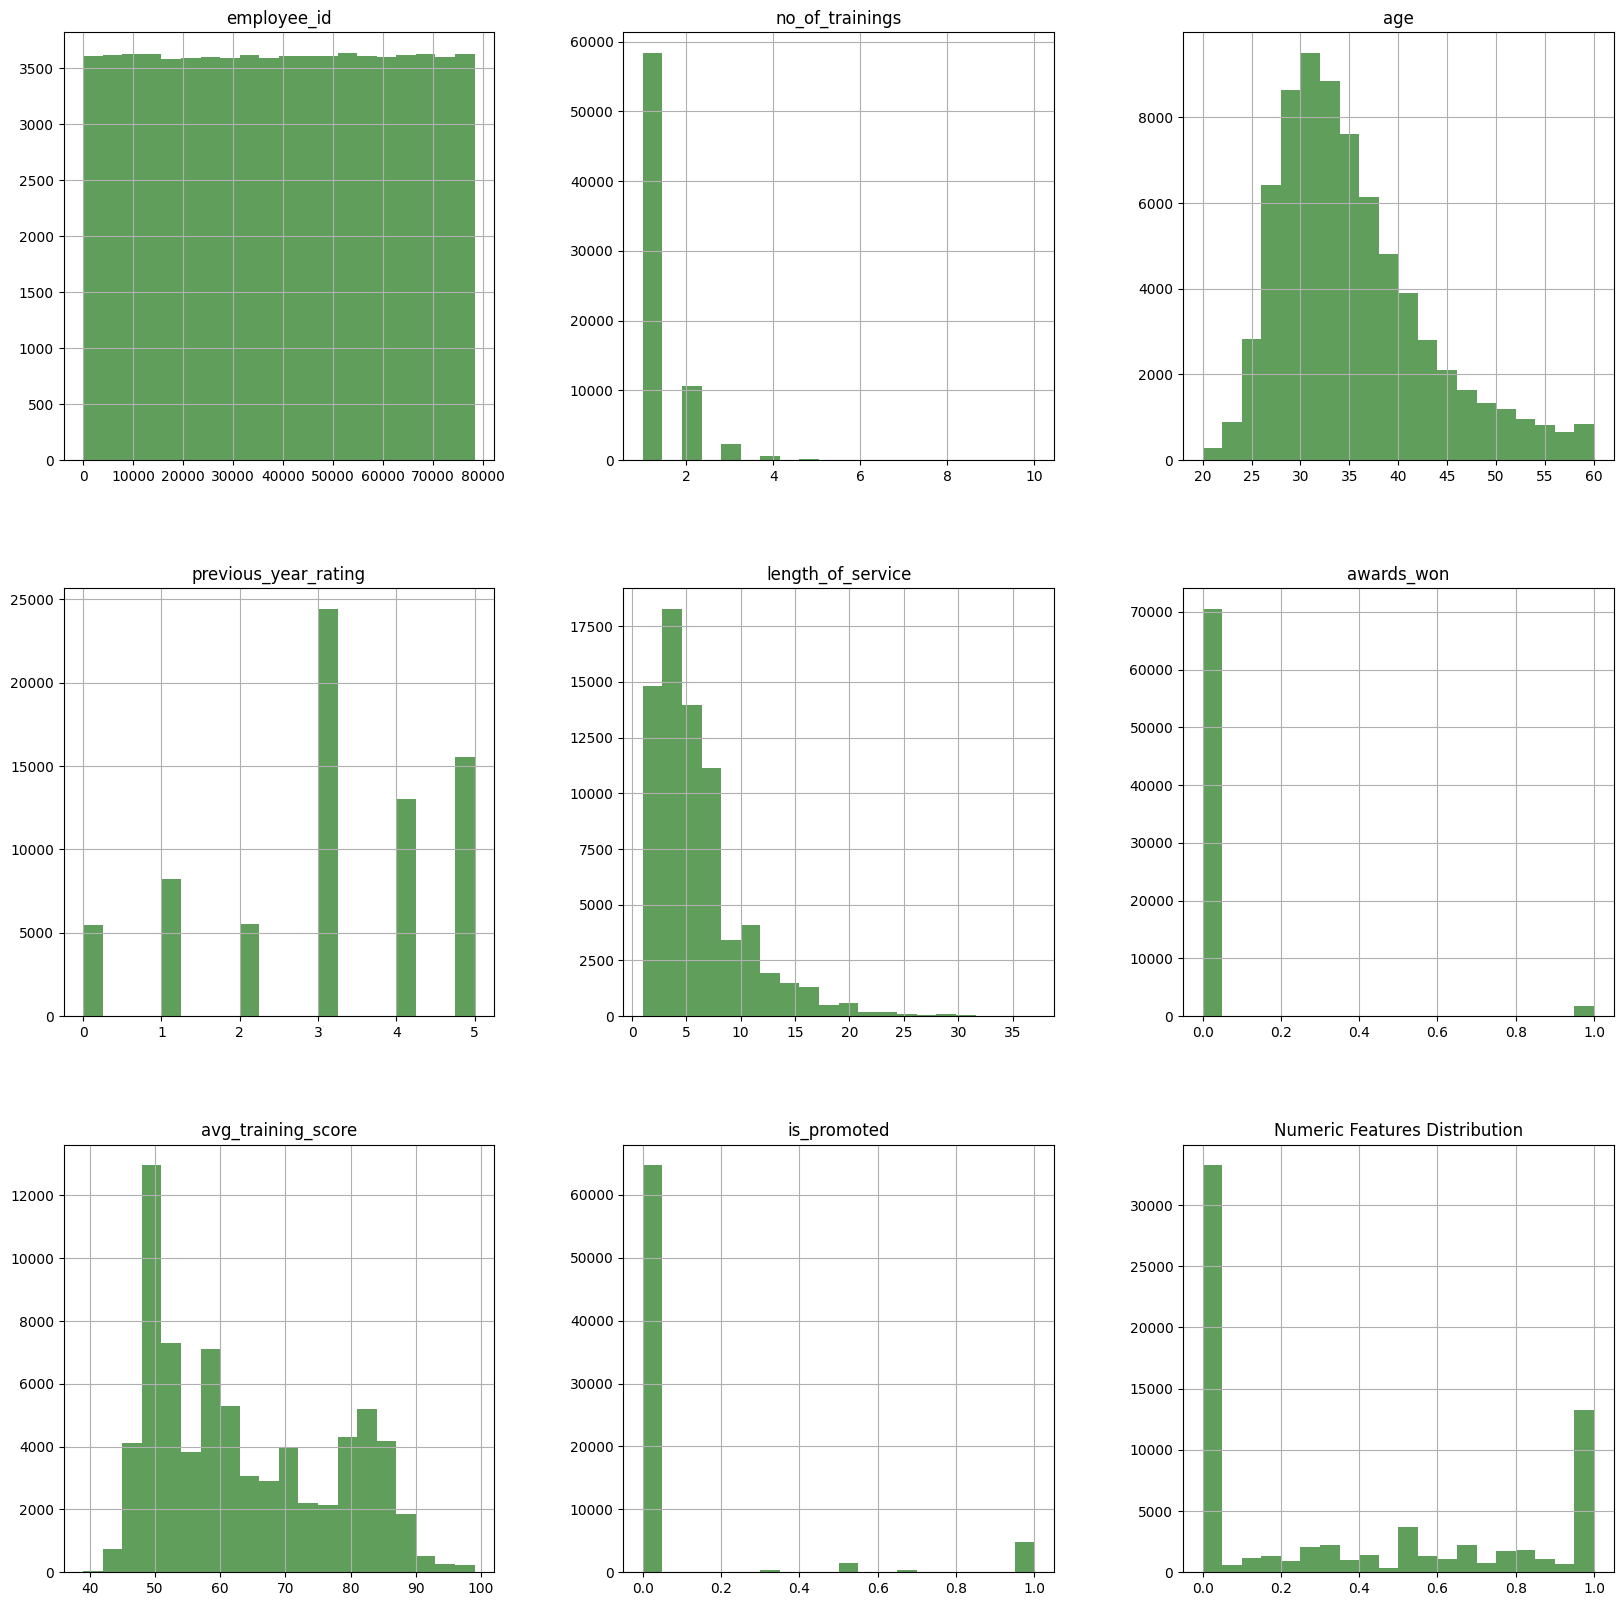

In [31]:
## Numeric Features Distribution

concatenated_dataset.hist(figsize=(20,20),bins = 20, color="#107009AA")
plt.title("Numeric Features Distribution")
plt.show()

###### Analysing each variable in deep further ...

##### Using Bar Charts and Pie Charts for all the categorical variables present

In [32]:
concatenated_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72223 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            72223 non-null  int64  
 1   department             72223 non-null  object 
 2   region                 72223 non-null  object 
 3   education              72223 non-null  object 
 4   gender                 72223 non-null  object 
 5   recruitment_channel    72223 non-null  object 
 6   no_of_trainings        72223 non-null  int64  
 7   age                    72223 non-null  int64  
 8   previous_year_rating   72223 non-null  float64
 9   length_of_service      72223 non-null  int64  
 10  awards_won             72223 non-null  int64  
 11  avg_training_score     72223 non-null  float64
 12  is_promoted            72223 non-null  float64
 13  KPIs_met_more_than_80  72223 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 8.3+ MB


##### Department Distribution

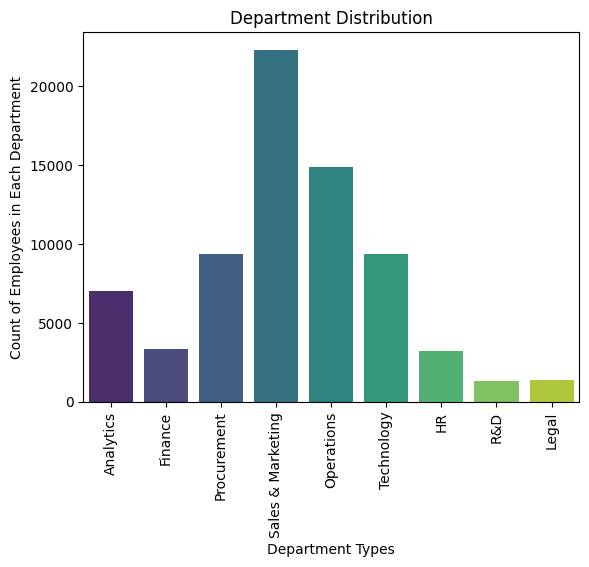

In [59]:
## department distribution
sns.countplot(x = "department" , data=concatenated_dataset, palette='viridis')
plt.title("Department Distribution")
plt.xlabel("Department Types")
plt.ylabel("Count of Employees in Each Department")
plt.xticks(rotation=90)
plt.show()

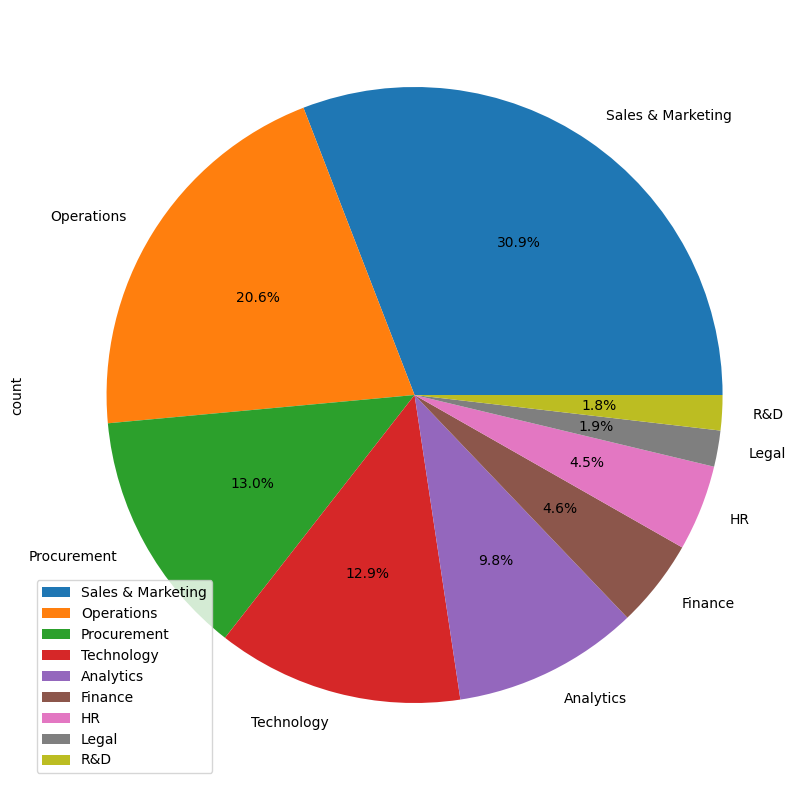

In [34]:
## Pie-chart for department distribution

concatenated_dataset["department"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

###### We can see that, Sales and marketing department employees data is more than other departments. Its 30% in whole data and on the second number, Oprations department is 20%

#### Region Distribution

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33],
 [Text(0, 0, 'region_7'),
  Text(1, 0, 'region_2'),
  Text(2, 0, 'region_22'),
  Text(3, 0, 'region_15'),
  Text(4, 0, 'region_32'),
  Text(5, 0, 'region_27'),
  Text(6, 0, 'region_24'),
  Text(7, 0, 'region_4'),
  Text(8, 0, 'region_31'),
  Text(9, 0, 'region_17'),
  Text(10, 0, 'region_21'),
  Text(11, 0, 'region_8'),
  Text(12, 0, 'region_16'),
  Text(13, 0, 'region_28'),
  Text(14, 0, 'region_34'),
  Text(15, 0, 'region_6'),
  Text(16, 0, 'region_14'),
  Text(17, 0, 'region_26'),
  Text(18, 0, 'region_19'),
  Text(19, 0, 'region_1'),
  Text(20, 0, 'region_11'),
  Text(21, 0, 'region_23'),
  Text(22, 0, 'region_12'),
  Text(23, 0, 'region_13'),
  Text(24, 0, 'region_25'),
  Text(25, 0, 'region_30'),
  Text(26, 0, 'region_20'),
  Text(27, 0, 'region_29'),
  Text(28, 0, 'region_9'),
  Text(29,

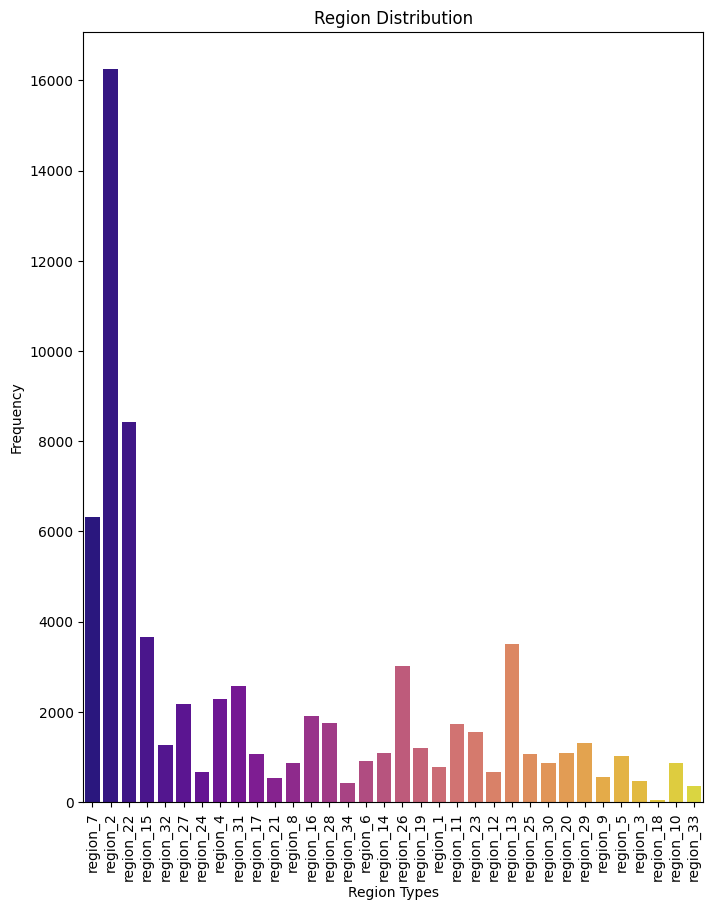

In [58]:
plt.figure(figsize=(8,10))
sns.countplot(x="region" , data=concatenated_dataset, palette='plasma')
plt.title("Region Distribution")
plt.xlabel("Region Types")
plt.ylabel("Frequency")
plt.xticks(rotation=90)

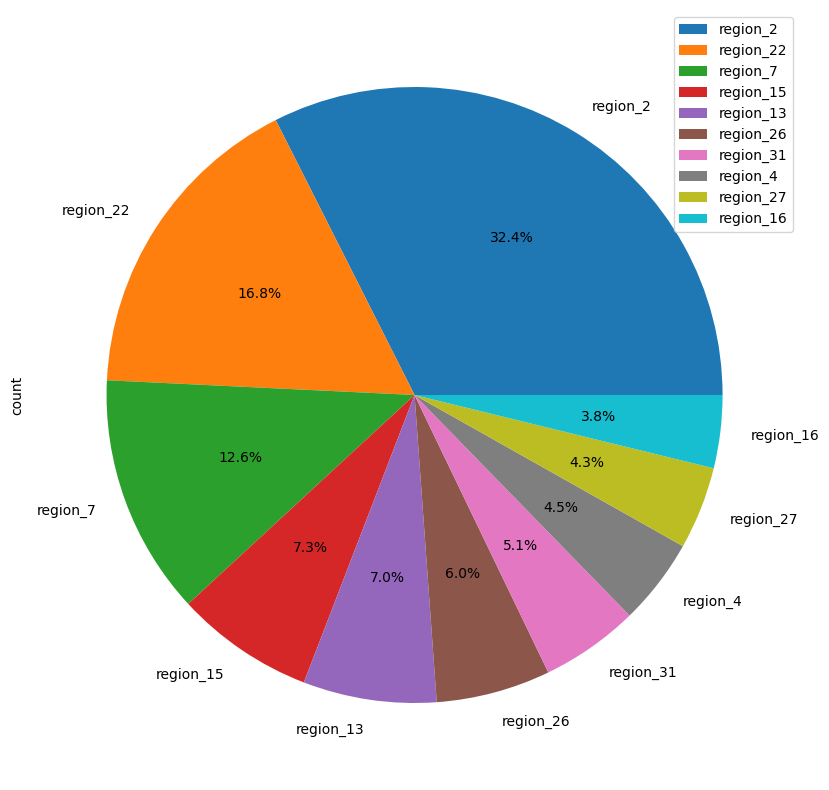

In [36]:
## Pie Chart Distribution for regions

concatenated_dataset["region"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10)).legend()

###### If we look at the region, region_2 is more in counts with 32% and region_22 is 16% and region_7 is 12%. It means that these three regions cover almost 60% data.

##### Education Distribution

In [37]:
## Pie chart distribution

concatenated_dataset["education"].unique()


array(["Bachelor's", "Master's & above", 'Masters & above', 'Bachelors',
       'Below Secondary'], dtype=object)

In [38]:
## As we see few values are duplicating here, we will replace the columns values to any single one

concatenated_dataset["education"] = concatenated_dataset["education"].replace({"Bachelors":"Bachelor's"})
concatenated_dataset["education"] = concatenated_dataset["education"].replace({"Masters & above":"Master's & above"})

concatenated_dataset["education"].unique()

array(["Bachelor's", "Master's & above", 'Below Secondary'], dtype=object)

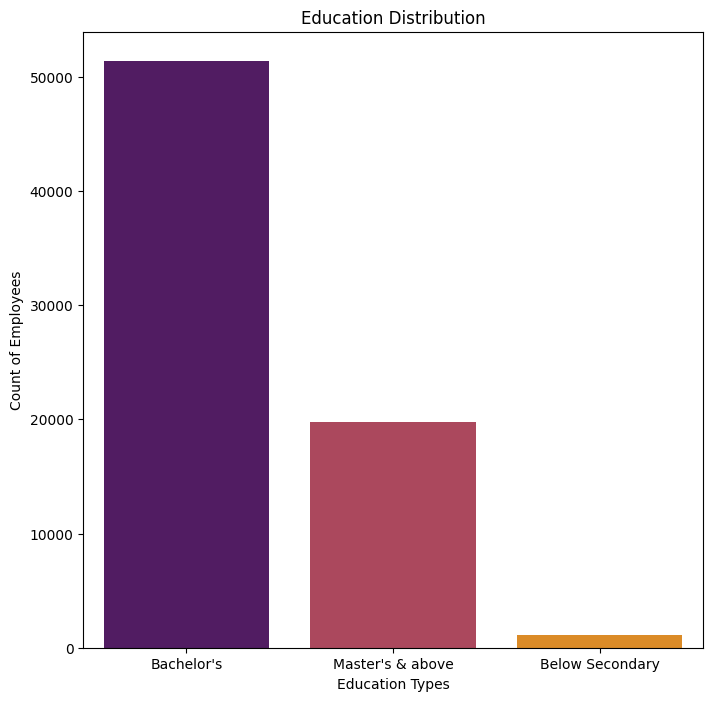

In [57]:
## Bar chart 

## Bar chart distribution
plt.figure(figsize=(8,8))
sns.countplot(x="education", data=concatenated_dataset, palette="inferno")
plt.title("Education Distribution")
plt.xlabel("Education Types")
plt.ylabel("Count of Employees")
plt.show()

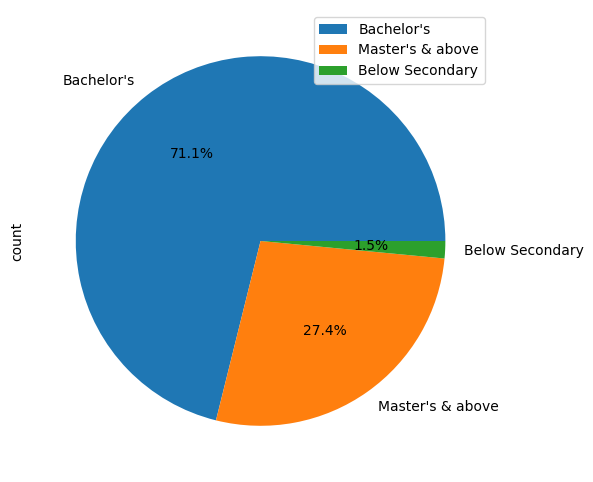

In [40]:
## Pie Chart 

concatenated_dataset["education"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6)).legend()


###### If we look at the education of employees, Bacherlors are too much with 71% data, 27.4% Master and 1.5% below secondary education.

##### Gender Distribution

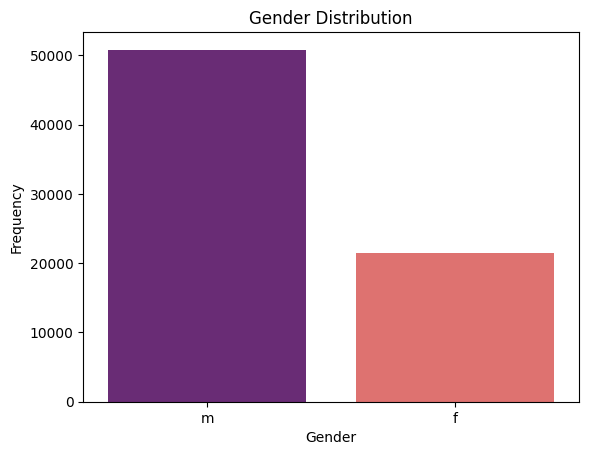

In [56]:
sns.countplot(data= concatenated_dataset, x = "gender", palette='magma')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.show()

In [ ]:
## Pie chart distribution

concatenated_dataset["education"].unique()


array(["Bachelor's", "Master's & above", 'Masters & above', 'Bachelors',
       'Below Secondary'], dtype=object)

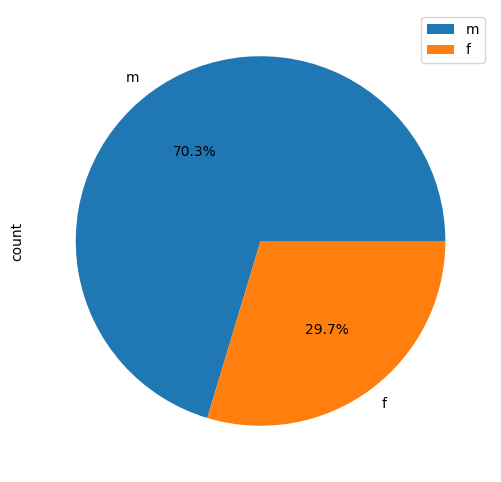

In [42]:
concatenated_dataset["gender"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6,6), startangle=0).legend()

###### If we look at the gender, males are too much again with amlost 38K data and females 16K.

##### Recruitment Channel Distribution

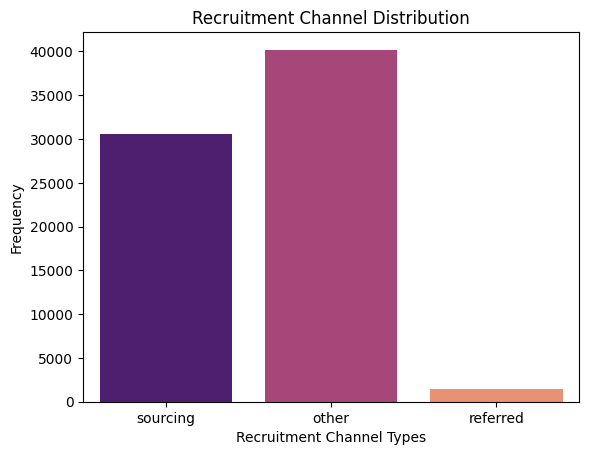

In [54]:
sns.countplot(data= concatenated_dataset, x = "recruitment_channel", palette='magma')
plt.title("Recruitment Channel Distribution")
plt.xlabel("Recruitment Channel Types")
plt.ylabel("Frequency")
plt.show()

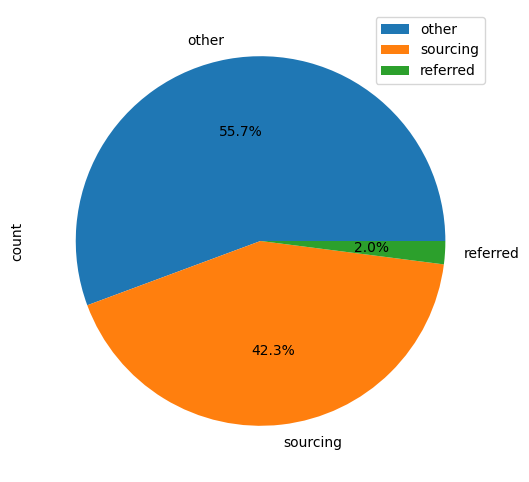

In [44]:
## Pie chart distribution

concatenated_dataset["recruitment_channel"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0).legend()

###### In the recruitment_channel, other are 55.7%,referred cases are 2.0% and sourcing 42.3%.

##### No. of Training Distribution

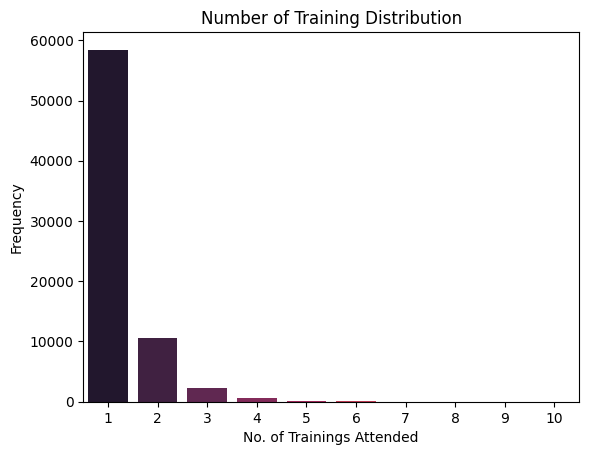

In [53]:
sns.countplot(x = "no_of_trainings", data=concatenated_dataset, palette="rocket" )
plt.title("Number of Training Distribution")
plt.xlabel("No. of Trainings Attended")
plt.ylabel("Frequency")
plt.show()

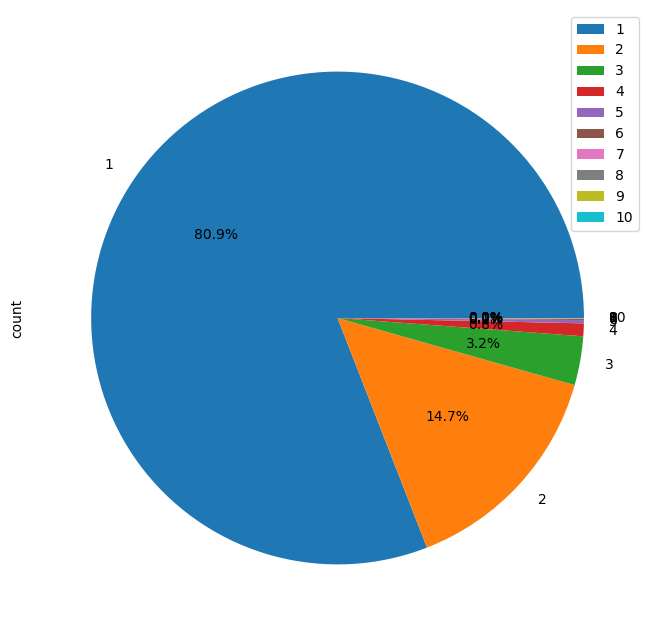

In [46]:
concatenated_dataset["no_of_trainings"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8,8), startangle=0).legend()

###### If we look at the no_of_trainings, all employees participated one time with 81%.

##### Age distribution

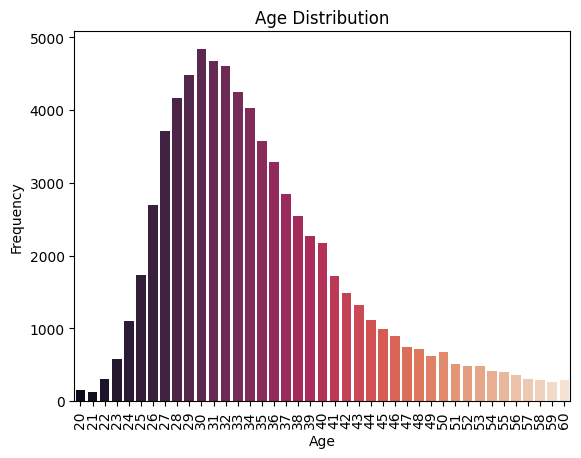

<Figure size 1000x900 with 0 Axes>

In [61]:
sns.countplot(x="age", data=concatenated_dataset, palette="rocket")
plt.title("Age Distribution")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.figure(figsize=(10,9))
plt.show()

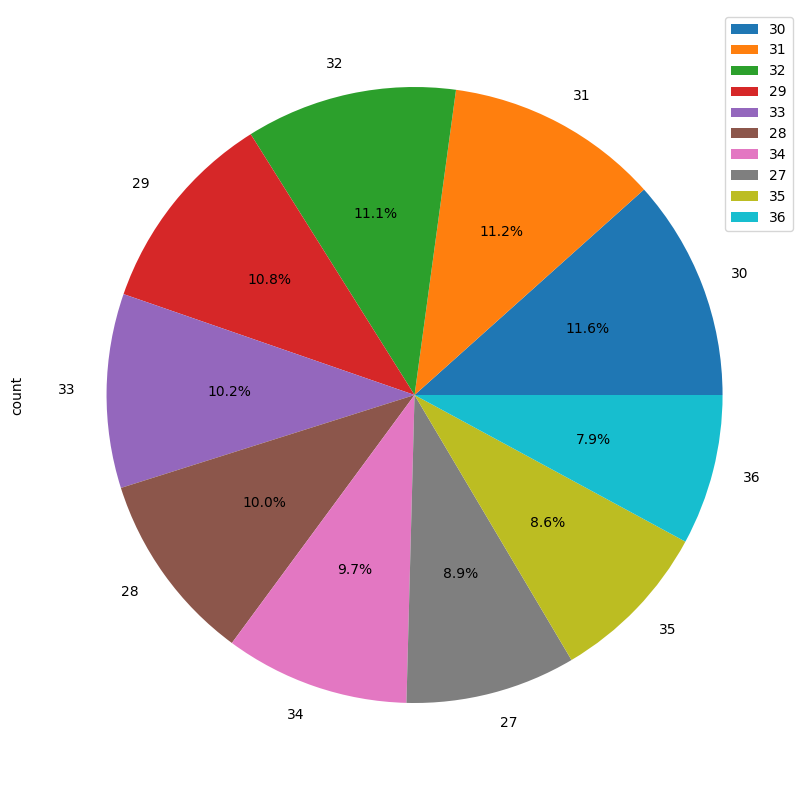

In [62]:
### Pie chart distribution

concatenated_dataset["age"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(10, 10), startangle=0).legend()

###### In the age, most ages are between 27 to 36 years

##### Previous Year Ratings Distribution

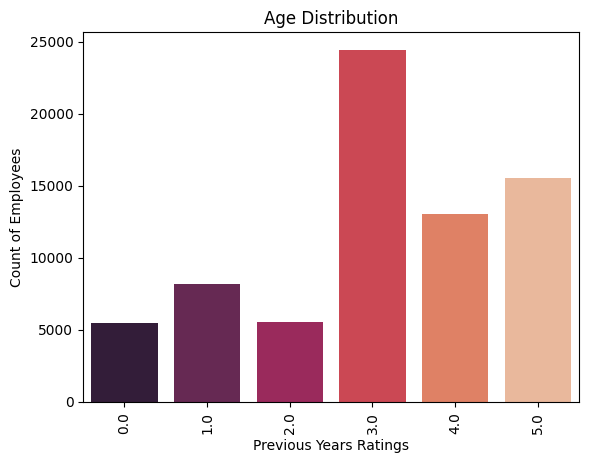

In [63]:

sns.countplot(x="previous_year_rating", data=concatenated_dataset, palette="rocket")
plt.title("Age Distribution")
plt.xticks(rotation=90)
plt.xlabel("Previous Years Ratings")
plt.ylabel("Count of Employees")
plt.show()

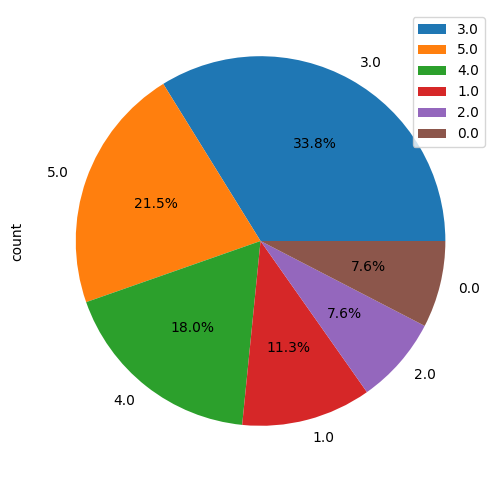

In [66]:
concatenated_dataset["previous_year_rating"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6, 6), startangle=0).legend()

###### Rating 3 is most used for the employees in all data with 33.8%, followed by 5 rating with 21.5% and 4 rating with 18% count

##### Length Of service Distribution

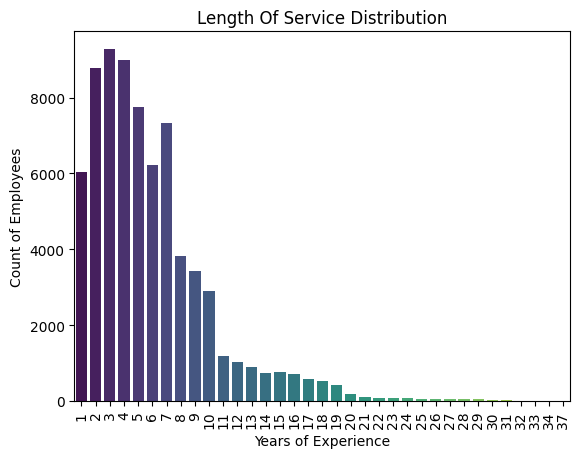

In [68]:
sns.countplot(x="length_of_service", data=concatenated_dataset, palette="viridis")
plt.title("Length Of Service Distribution")
plt.xticks(rotation=90)
plt.xlabel("Years of Experience")
plt.ylabel("Count of Employees")
plt.show()

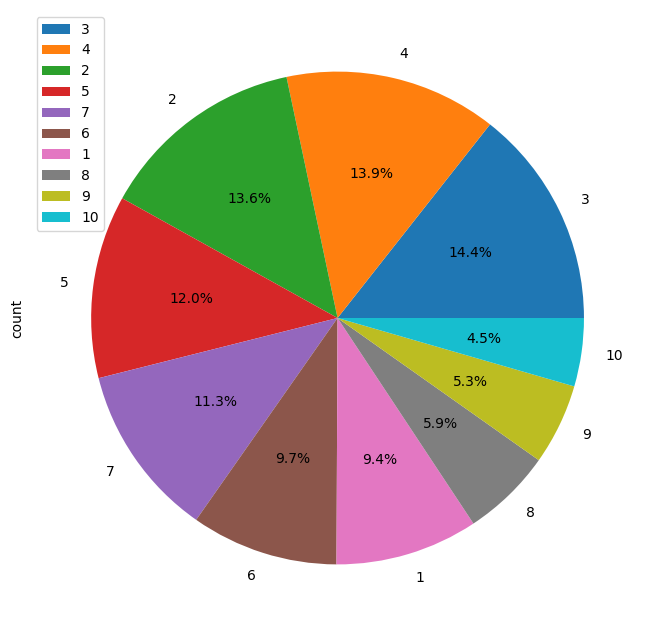

In [70]:
concatenated_dataset["length_of_service"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8), startangle=0).legend()

###### Length of service is from 1 to 10 years. After 10 years, there are few employees

##### Awards Won Distribution

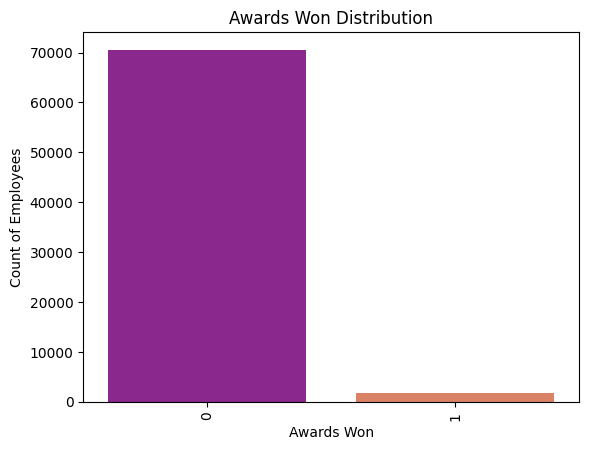

In [71]:
sns.countplot(data= concatenated_dataset, x = "awards_won", palette='plasma')
plt.title("Awards Won Distribution")
plt.xticks(rotation=90)
plt.xlabel("Awards Won")
plt.ylabel("Count of Employees")
plt.show()

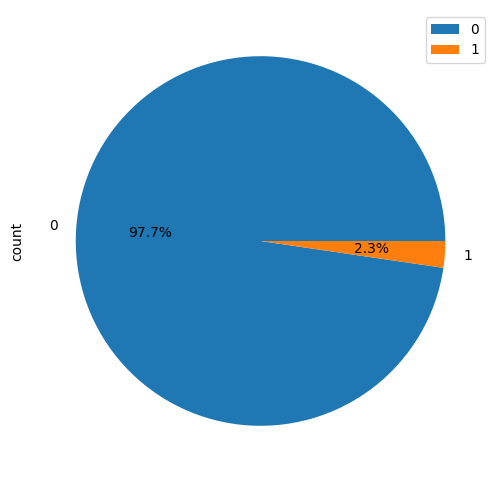

In [73]:
concatenated_dataset["awards_won"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6,6), startangle=0).legend()

###### Only 2.3% employees won the awards and 97.7% did not won. Looking at awards, its very less ratio.

##### Avg Training Score Distribution

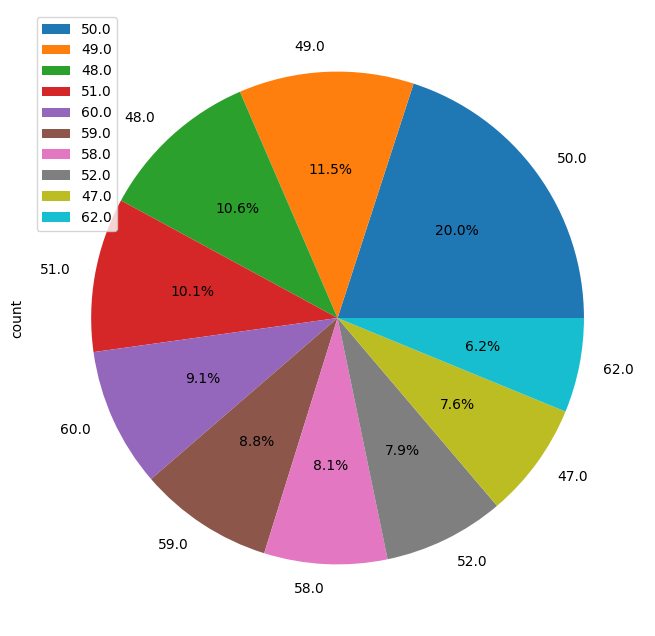

In [75]:
concatenated_dataset["avg_training_score"].value_counts().head(10).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8), startangle=0).legend()

##### KPI Met More than 80% Distribution

Text(0.5, 1.0, 'KPI Metrics Distribution of Employees who have more than 80% metric score')

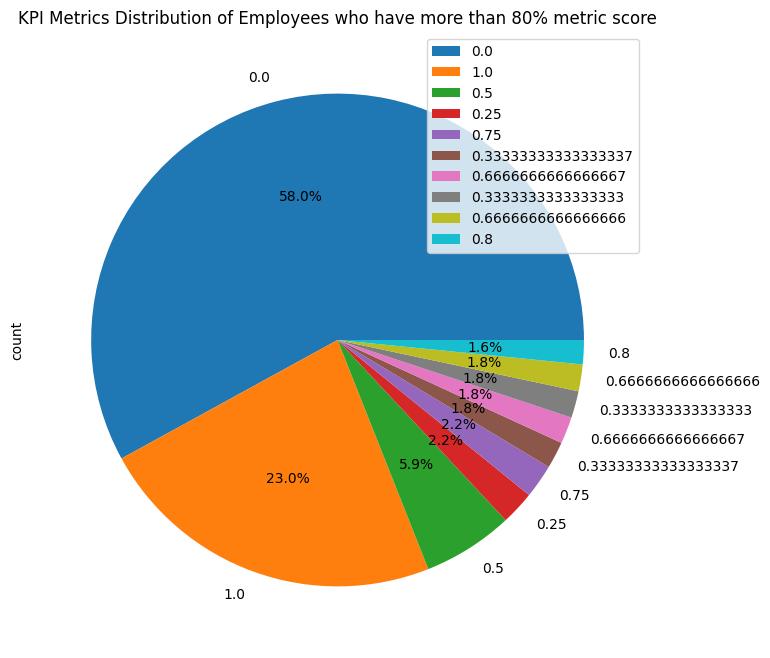

In [78]:
concatenated_dataset["KPIs_met_more_than_80"].value_counts().head(10).plot(kind="pie", autopct='%1.1f%%', figsize=(8, 8), startangle=0).legend()
plt.title("KPI Metrics Distribution of Employees who have more than 80% metric score")

##### Is Promoted Distribution

In [81]:
concatenated_dataset["is_promoted"] = concatenated_dataset["is_promoted"].apply(lambda x: 1.0 if x > 0.0 else 0.0)

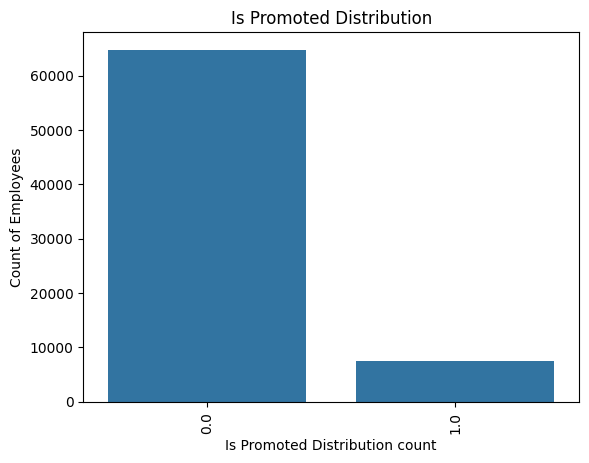

In [82]:
sns.countplot(data= concatenated_dataset, x = "is_promoted")
plt.title("Is Promoted Distribution")
plt.xticks(rotation=90)
plt.xlabel("Is Promoted Distribution count")
plt.ylabel("Count of Employees")
plt.show()

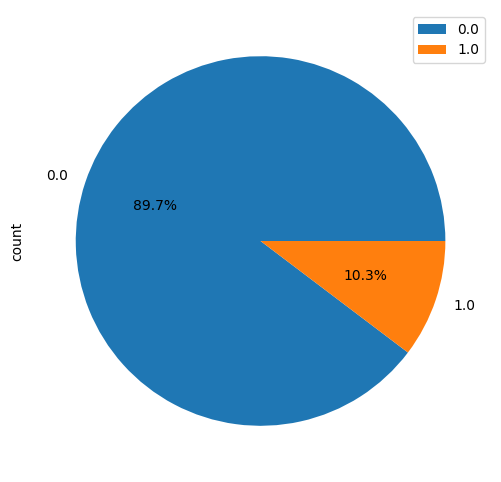

In [84]:
concatenated_dataset["is_promoted"].value_counts().head(7).plot(kind = 'pie', autopct='%1.1f%%', figsize=(6,6), startangle=0).legend()

###### We can clearly see that, the data is not balanced. The promoted employees are only 7439 and not promoted employees are 64831. 89.7% and 10.3% ratio is very unbalanced.

#### Distribution of promoted employees ratio across different no_of_trainings

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different no of trainings')

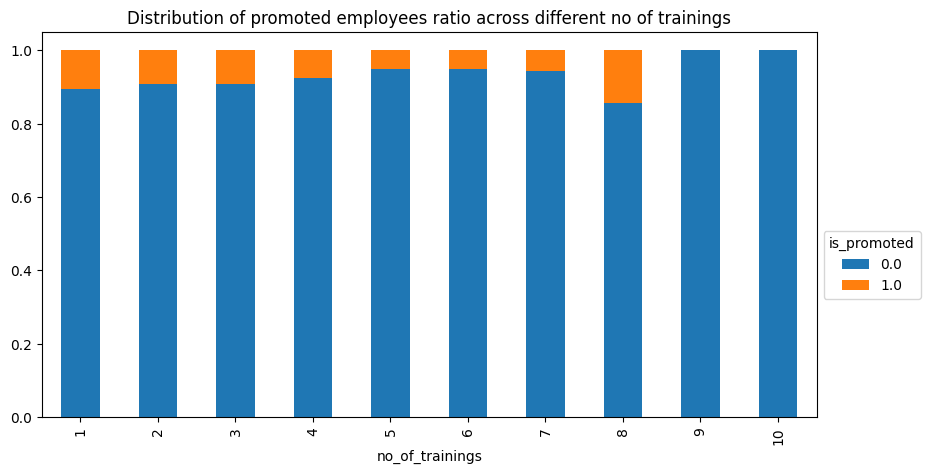

In [86]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset["no_of_trainings"],concatenated_dataset["is_promoted"],normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different no of trainings")

##### Distribution of promoted employees ratio across different KPI Metrics Achieved

In [89]:
concatenated_dataset["KPIs_met_more_than_80"] = concatenated_dataset["KPIs_met_more_than_80"].apply(lambda x: 1.0 if x > 0.0 else 0.0)

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different KPI Metrics Achieved')

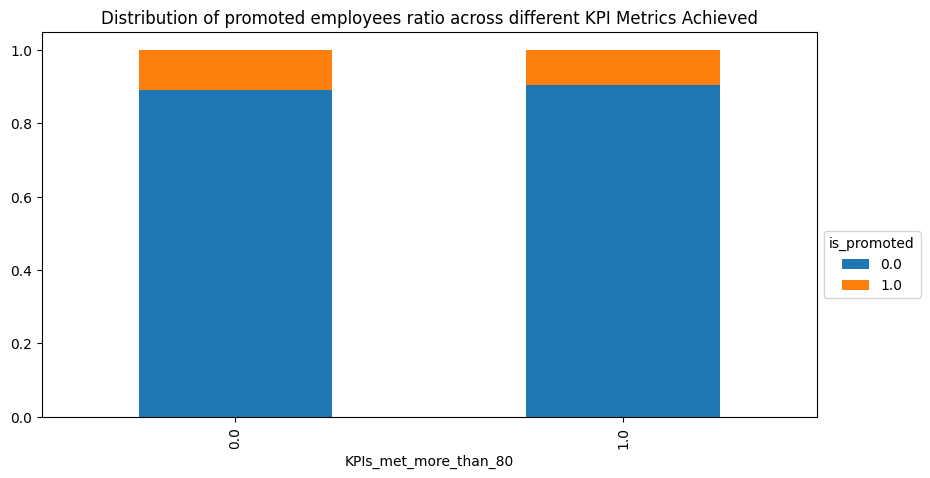

In [90]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset["KPIs_met_more_than_80"],concatenated_dataset["is_promoted"],normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different KPI Metrics Achieved")

###### The above figure shows that whether the KPI metrics is more than 80% or less, there is equal promotion activity done

##### Distribution of promoted employees ratio across different previous_year_rating

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different Previous Year Rating')

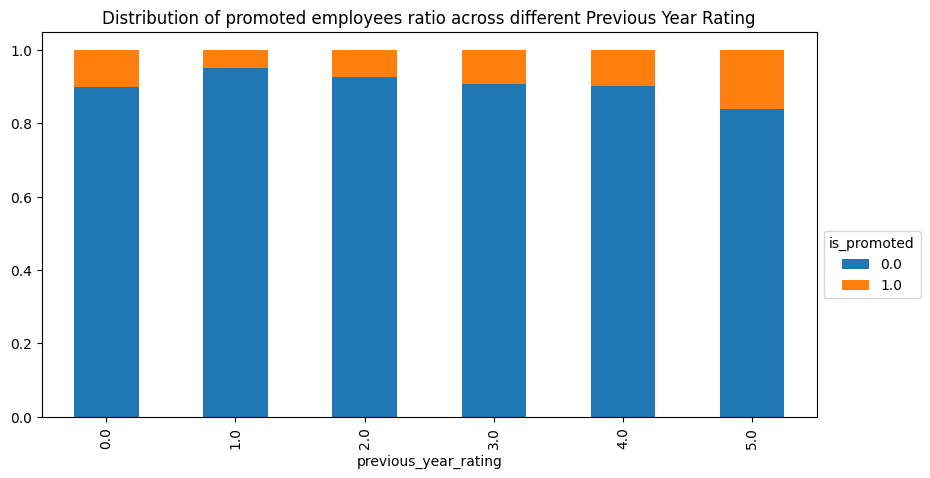

In [91]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset.previous_year_rating, concatenated_dataset.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different Previous Year Rating")

###### Previous year training matter for employee promotion. As we can see that more years training means more employees promoted.

##### Distribution of promoted employees ratio across different length_of_service

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different Years of Experience')

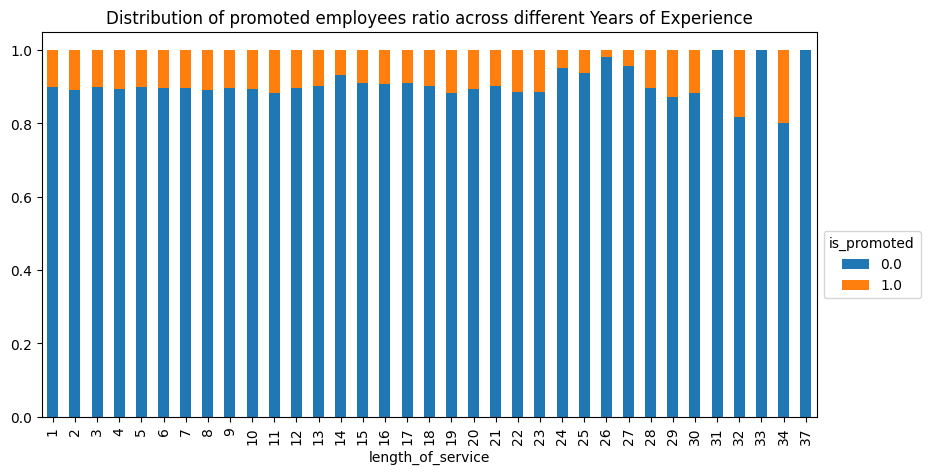

In [97]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset.length_of_service,concatenated_dataset.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different Years of Experience")

###### From year of service 1 to 23, employees promoted but in after 24 years of service, peoples are often promoted.

##### Distribution of promoted employees ratio across different awards_won

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different awards won')

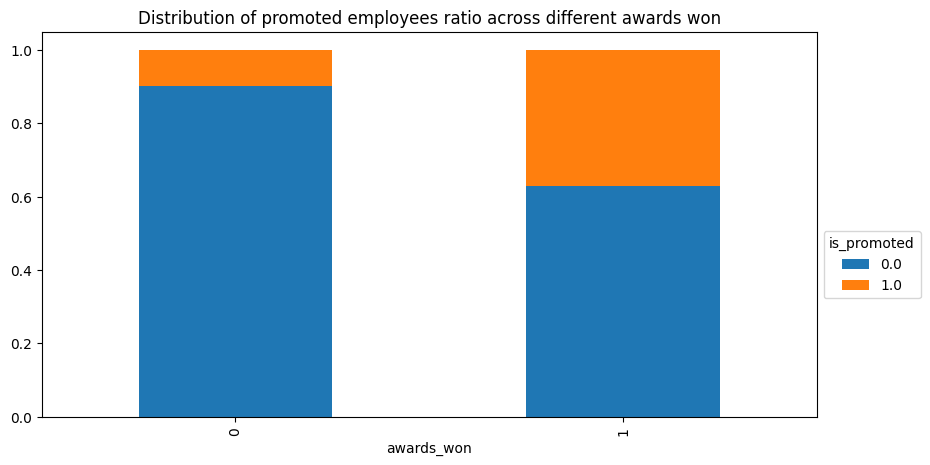

In [95]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset.awards_won,concatenated_dataset.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different awards won")

###### Wining awards means more chances to get promoted. as we can see that employees with awards have higher count of promotions.

##### Distribution of promoted employees ratio across different avg_training_score

Text(0.5, 1.0, 'Distribution of promoted employees ratio across different average training score')

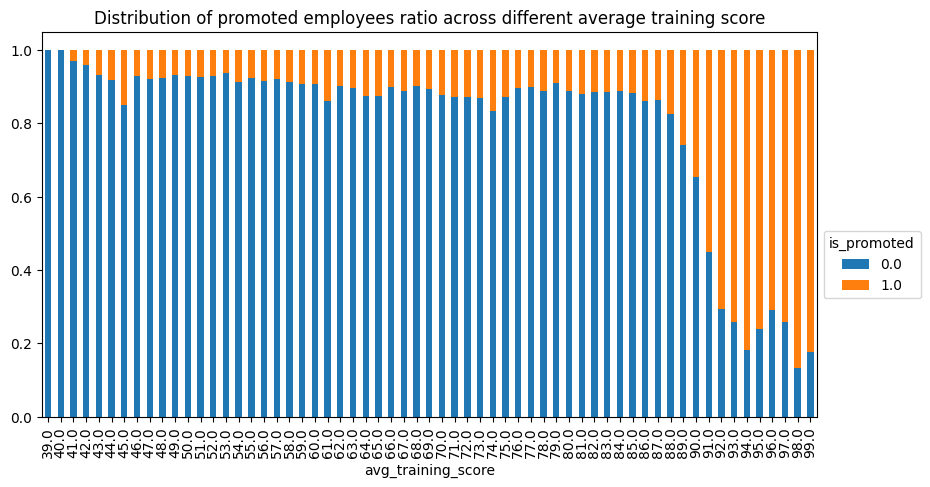

In [96]:
plt.rcParams['figure.figsize'] = [10, 5]
score_bin = pd.crosstab(concatenated_dataset.avg_training_score,concatenated_dataset.is_promoted,normalize='index')
score_bin.plot.bar(stacked=True)
plt.legend(title='is_promoted',loc='upper left',bbox_to_anchor=(1, 0.5))
plt.title("Distribution of promoted employees ratio across different average training score")

###### More Training Score means more chances of promotions

#### Bivariate Analysis

In [98]:
## checking categorical type columns in the data

concatenated_dataset.select_dtypes(include='object')

,department,region,education,gender,recruitment_channel
0,Analytics,region_7,Bachelor's,m,sourcing
1,Finance,region_2,Master's & above,f,sourcing
54808,Procurement,region_22,Master's & above,f,other
2,Sales & Marketing,region_2,Bachelor's,m,other
3,Analytics,region_7,Master's & above,m,other
...,...,...,...,...,...
54804,Sales & Marketing,region_22,Bachelor's,m,sourcing
72224,Sales & Marketing,region_14,Bachelor's,f,sourcing
54805,Procurement,region_2,Bachelor's,f,sourcing
54806,Operations,region_13,Bachelor's,f,sourcing


### Encoding the categorical values into numerical type

In [103]:
from sklearn import preprocessing

data = concatenated_dataset

## moving the is_promoted col to last and KPI column before that

cols = data.columns.tolist()
cols.remove('is_promoted')
cols.remove('KPIs_met_more_than_80')
new_cols = cols + ["KPIs_met_more_than_80", "is_promoted"]
data = data[new_cols]


pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['department'])
data['department'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['region'])
data['region'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['education'].astype(str))
data['education'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['gender'])
data['gender'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'].astype(str))
data['recruitment_channel'] = encpro

pro= preprocessing.LabelEncoder()
encpro=pro.fit_transform(data['recruitment_channel'])
data['recruitment_channel'] = encpro

<Axes: title={'center': 'Pearson Correlation of Features'}>

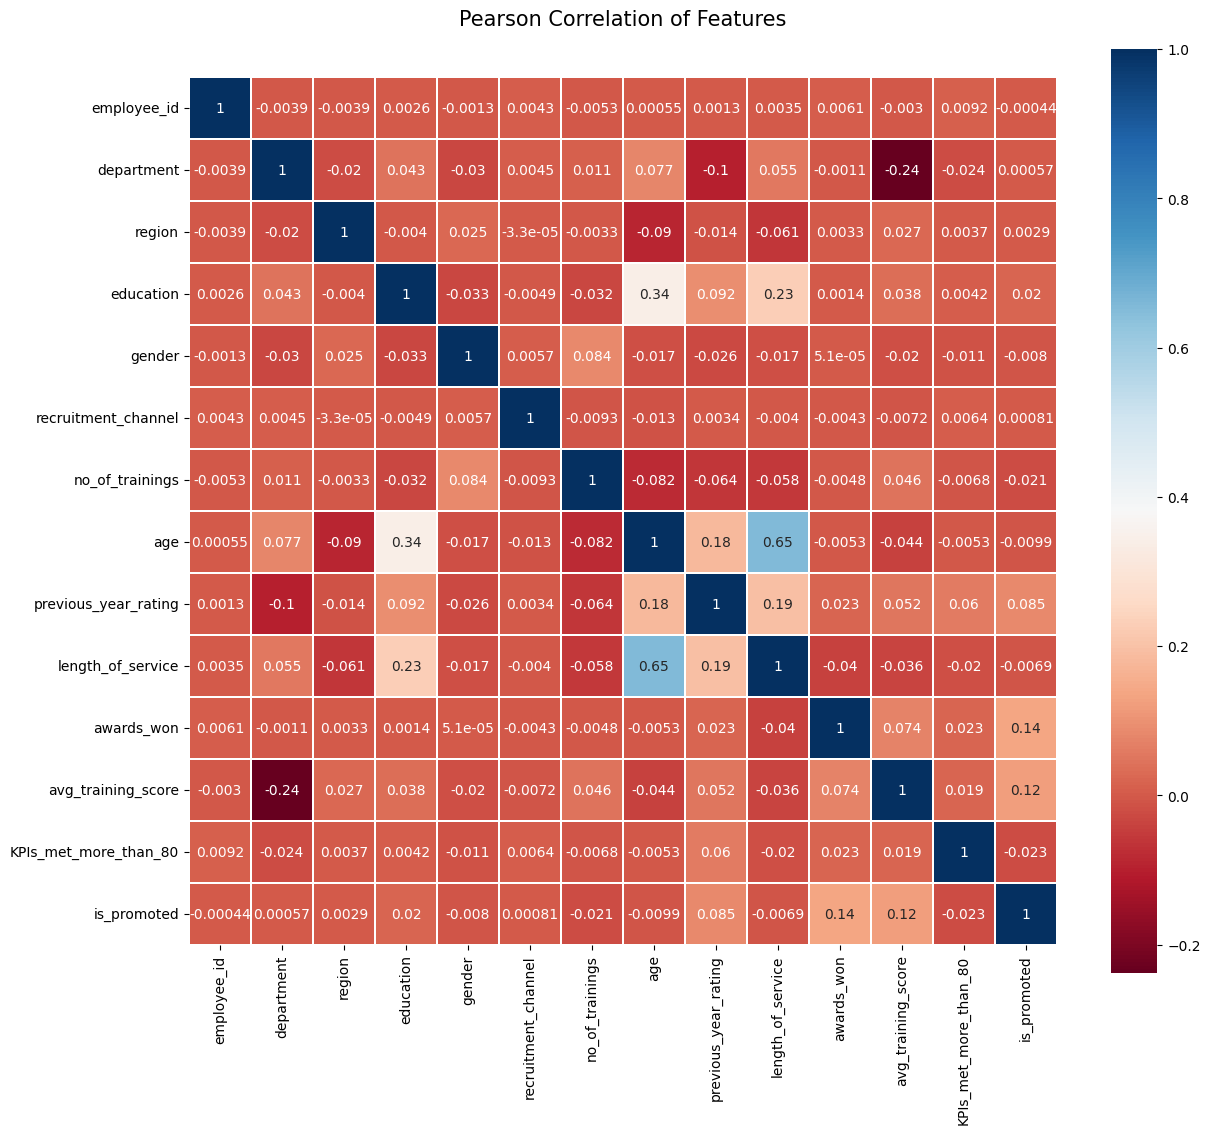

In [118]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

##### The target variable "is_promoted" is good correlated with the following features: 
 - deparment
 - region
 - education
 - recruitement_channel
 - previous year rating
 - awards won
 - avg training score

##### The target variable "is_promoted" is not good correlated with the following features:
 - employee Id
 - gender
 - no of training
 - age
 - length of service
 - KPI Met More than 80

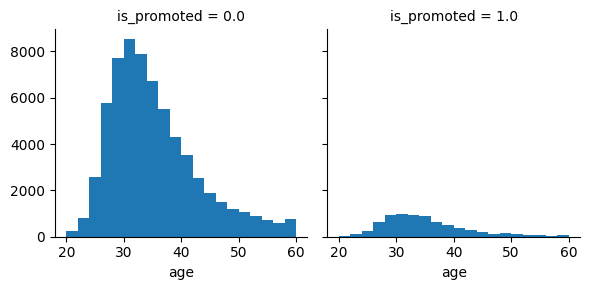

In [105]:
### age plot with is_promoted 

g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'age', bins=20)

###### the more ages are with not promoted and less ages are with promoted employees.

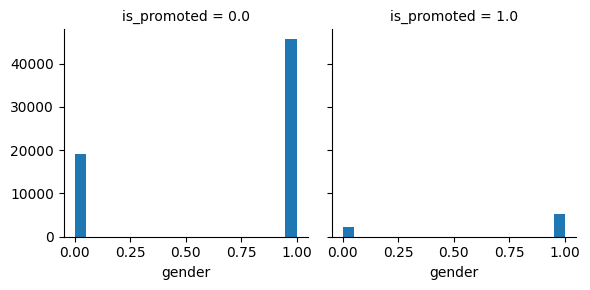

In [108]:
### gender plot with is_promoted

g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'gender', bins=20)
plt.show()

###### The counts of gender are more in not promoted and less in promoted. Males are more in both cases

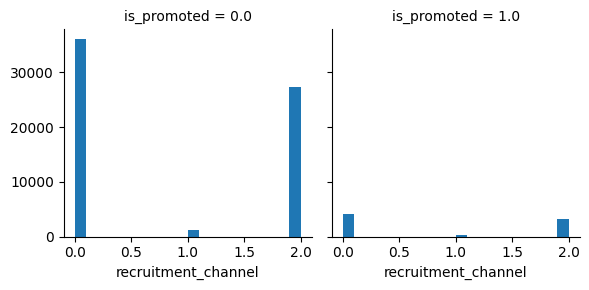

In [109]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'recruitment_channel', bins=20)

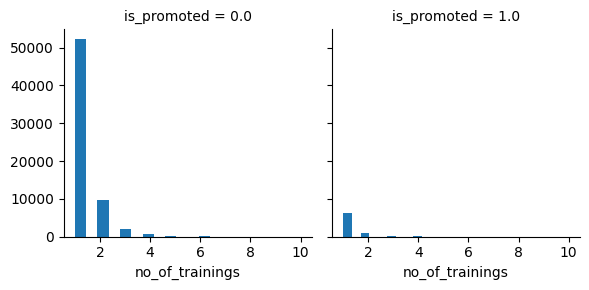

In [110]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'no_of_trainings', bins=20)

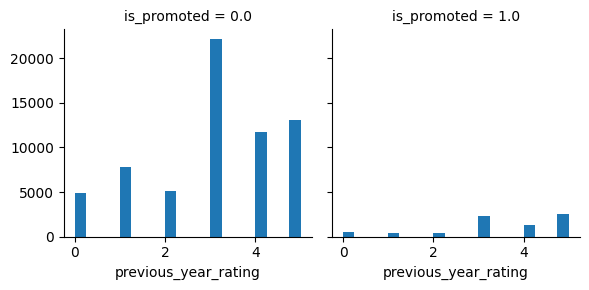

In [111]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'previous_year_rating', bins=20)

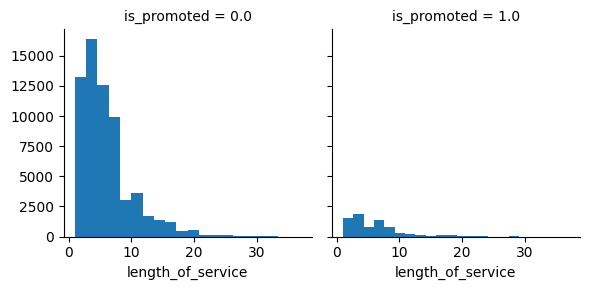

In [112]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'length_of_service', bins=20)

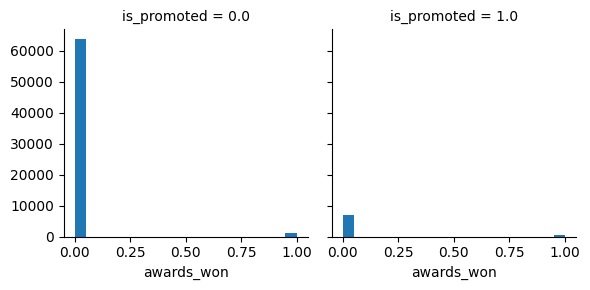

In [113]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'awards_won', bins=20)

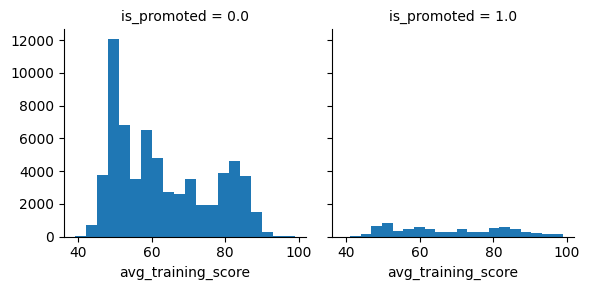

In [114]:
g = sns.FacetGrid(data, col='is_promoted')
g.map(plt.hist, 'avg_training_score', bins=20)

#### Performing Machine Learning Algorithms 

1) Decision Tree
2) Random Forest
3) KNN
4) XGBoost
5) SVM
7) Gaussian Naive Bayes
8) Gradient Boosting
9) Logistic Regression

In [119]:
concatenated_dataset.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won,avg_training_score,is_promoted,KPIs_met_more_than_80
0,1,0,31,0,1,2,2,29,3.0,5,0,85.0,0.0,0.0
1,2,1,11,2,0,2,1,35,1.0,2,0,63.0,0.0,0.0
54808,3,5,14,2,0,0,1,38,5.0,4,0,67.0,0.0,1.0
2,4,7,11,0,1,0,1,25,3.0,2,0,53.0,0.0,1.0
3,5,0,31,2,1,0,2,46,3.0,7,0,86.0,0.0,1.0


In [120]:
## splitting the data for training and testing

X = concatenated_dataset.drop('is_promoted', axis=1)
y = concatenated_dataset['is_promoted']

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [122]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler(feature_range=(0,1))
X_train=mms.fit_transform(X_train)
X_test=mms.fit_transform(X_test)
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [127]:
R= {'Model':[],'Accuracy':[],'Recall':[],'Precision':[],'F1':[]}
Results=pd.DataFrame(R)
Results.head()

,Model,Accuracy,Recall,Precision,F1


In [ ]:
### Performing Logistics Regression , Decision Trees and Random Forest Classifier

lr=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
svm = SVC(probability=True)
gnb = GaussianNB()
gb = GradientBoostingClassifier()


model_list = [lr, dc, rf, knn, xgb, svm, gnb, gb]

## storing the results in the dataframe

Results = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall', 'Precision', 'F1'])

for model in model_list:
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)

    print('Model:', model.__class__.__name__)
    print('-----------------------------------------------------------------------------------------------------------------------')
    print('Confusion Matrix:\n', confusion_matrix(y_test, ypred))
    print('Classification Report:\n', classification_report(y_test, ypred))
    print('Accuracy:', round(accuracy_score(y_test, ypred), 2))
    print('Precision:', round(precision_score(y_test, ypred), 2))
    print('Recall:', round(recall_score(y_test, ypred), 2))
    print('F1 Score:', round(f1_score(y_test, ypred), 2))
    print()

    # Append results
    R={'Model':model,
             'Accuracy':round(accuracy_score(y_test,ypred),2),
             'Recall':round(recall_score(y_test,ypred),2),
             'Precision':round(precision_score(y_test,ypred),2),
             'F1':round(f1_score(y_test,ypred),2)
            }
    Results=pd.concat([Results, pd.DataFrame([R])], ignore_index=True)

    
## displaying the summary 

print("Summary of Model Performance:")
print(Results.sort_values(by='F1', ascending=False))


Model: LogisticRegression
-----------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[12985    21]
 [ 1395    44]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     13006
         1.0       0.68      0.03      0.06      1439

    accuracy                           0.90     14445
   macro avg       0.79      0.51      0.50     14445
weighted avg       0.88      0.90      0.86     14445

Accuracy: 0.9
Precision: 0.68
Recall: 0.03
F1 Score: 0.06

Model: DecisionTreeClassifier
-----------------------------------------------------------------------------------------------------------------------
Confusion Matrix:
 [[11536  1470]
 [ 1049   390]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.89      0.90     13006
         1.0       0.21      0.27      0.24      1439

    ac